In [51]:
import requests
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\hg_detection.csv")
mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\mg_detection.csv")

chinese_1_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\chinese_1_detection.csv")
chinese_1_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\chinese_mg_1_detection.csv")
chinese_5_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\chinese_5_detection.csv")
chinese_5_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\chinese_mg_5_detection.csv")

spanish_1_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\spanish_1_detection.csv")
spanish_1_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\spanish_mg_1_detection.csv")
spanish_5_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\spanish_5_detection.csv")
spanish_5_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\spanish_mg_5_detection.csv")

russian_1_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\russian_1_detection.csv")
russian_1_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\russian_mg_1_detection.csv")
russian_5_hg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\russian_5_detection.csv")
russian_5_mg_detection = pd.read_csv(r"C:\Users\ehoga\Desktop\CMSC 25700\Final_Project\Data\russian_mg_5_detection.csv")


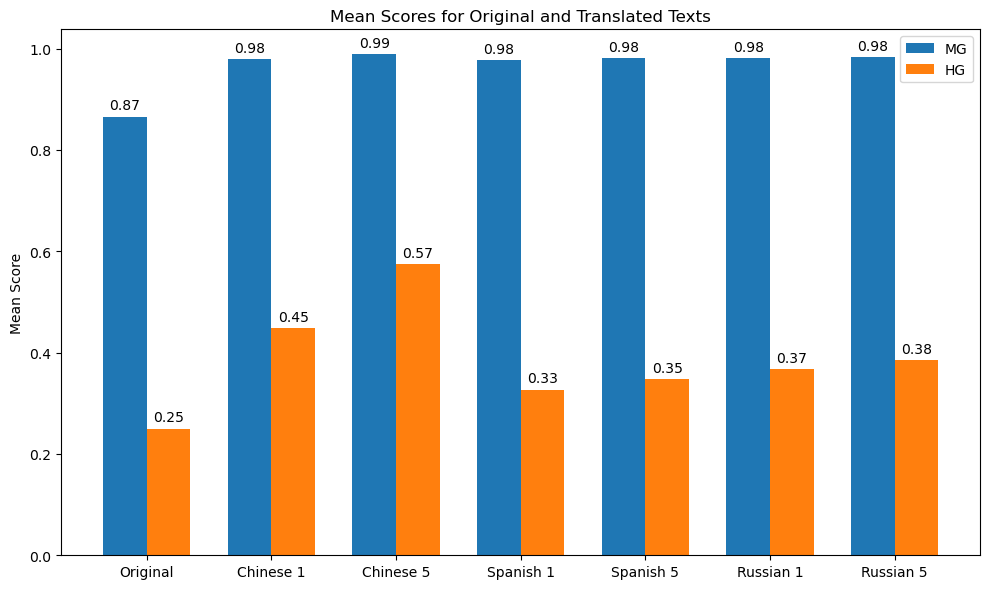

In [54]:
# Create a summary of mean scores
categories = ['Original', 'Chinese 1', 'Chinese 5', 'Spanish 1', 'Spanish 5', 'Russian 1', 'Russian 5']
mg_means = [
    mg_detection['score'].mean(),
    chinese_1_mg_detection['score'].mean(),
    chinese_5_mg_detection['score'].mean(),
    spanish_1_mg_detection['score'].mean(),
    spanish_5_mg_detection['score'].mean(),
    russian_1_mg_detection['score'].mean(),
    russian_5_mg_detection['score'].mean()
]
hg_means = [
    hg_detection['score'].mean(),
    chinese_1_hg_detection['score'].mean(),
    chinese_5_hg_detection['score'].mean(),
    spanish_1_hg_detection['score'].mean(),
    spanish_5_hg_detection['score'].mean(),
    russian_1_hg_detection['score'].mean(),
    russian_5_hg_detection['score'].mean()
]

x = np.arange(len(categories)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mg_means, width, label='MG')
rects2 = ax.bar(x + width/2, hg_means, width, label='HG')

ax.set_ylabel('Mean Score')
ax.set_title('Mean Scores for Original and Translated Texts')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

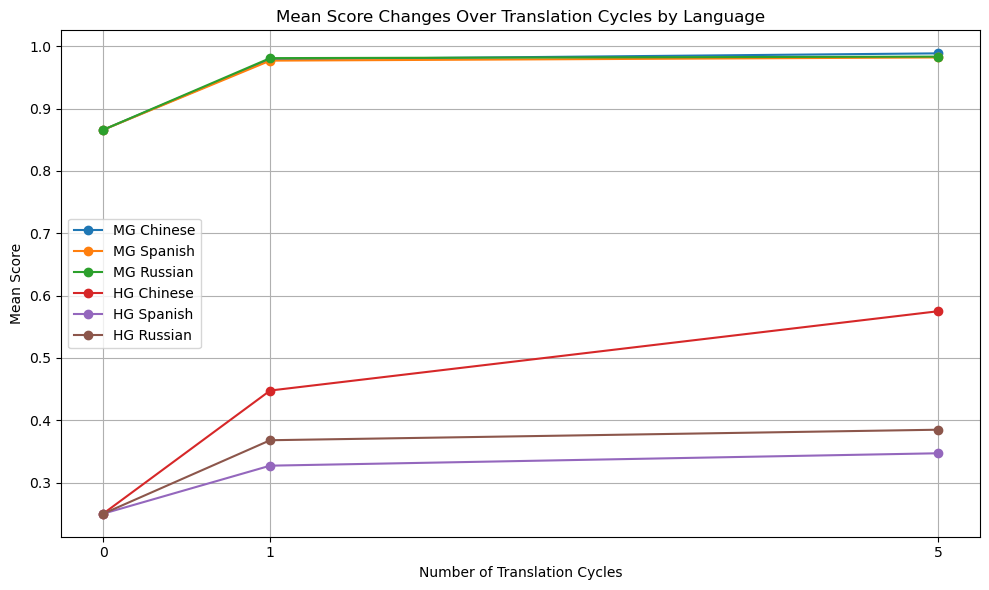

In [55]:
# Calculate the original scores
mg_original = mg_detection['score'].mean()
hg_original = hg_detection['score'].mean()

cycles = [0, 1, 5]

mg_chinese = [mg_original, 
              chinese_1_mg_detection['score'].mean(), 
              chinese_5_mg_detection['score'].mean()]

hg_chinese = [hg_original, 
              chinese_1_hg_detection['score'].mean(), 
              chinese_5_hg_detection['score'].mean()]

mg_spanish = [mg_original, 
              spanish_1_mg_detection['score'].mean(), 
              spanish_5_mg_detection['score'].mean()]

hg_spanish = [hg_original, 
              spanish_1_hg_detection['score'].mean(), 
              spanish_5_hg_detection['score'].mean()]

mg_russian = [mg_original, 
              russian_1_mg_detection['score'].mean(), 
              russian_5_mg_detection['score'].mean()]

hg_russian = [hg_original, 
              russian_1_hg_detection['score'].mean(), 
              russian_5_hg_detection['score'].mean()]

plt.figure(figsize=(10, 6))

plt.plot(cycles, mg_chinese, marker='o', label='MG Chinese')
plt.plot(cycles, mg_spanish, marker='o', label='MG Spanish')
plt.plot(cycles, mg_russian, marker='o', label='MG Russian')

plt.plot(cycles, hg_chinese, marker='o', label='HG Chinese')
plt.plot(cycles, hg_spanish, marker='o', label='HG Spanish')
plt.plot(cycles, hg_russian, marker='o', label='HG Russian')

plt.xlabel('Number of Translation Cycles')
plt.ylabel('Mean Score')
plt.title('Mean Score Changes Over Translation Cycles by Language')
plt.xticks(cycles)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
cum_sentence = []
count = 0

for entry in hg_detection['sentence_scores']:
    entry_score = 0
    entry = ast.literal_eval(entry)
    for sentence in entry:
        entry_score += (sentence['score'])
    cum_sentence.append(entry_score / len(entry))

print(np.mean(cum_sentence))
print(hg_detection['score'].mean())


data = [mg_detection, spanish_1_mg_detection, russian_1_mg_detection, chinese_1_mg_detection, spanish_5_mg_detection, russian_5_mg_detection, chinese_5_mg_detection]

for i, dataset in enumerate(data):
    score = 0
    for sentence in ast.literal_eval(dataset['sentence_scores'][5]):
        score += sentence['score']
    score = score / len(entry)
    print(i, score)